In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/heart_final.csv')

In [3]:
df.shape

(1190, 12)

In [4]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
df.duplicated().sum()

272

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(918, 12)

In [11]:
df.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

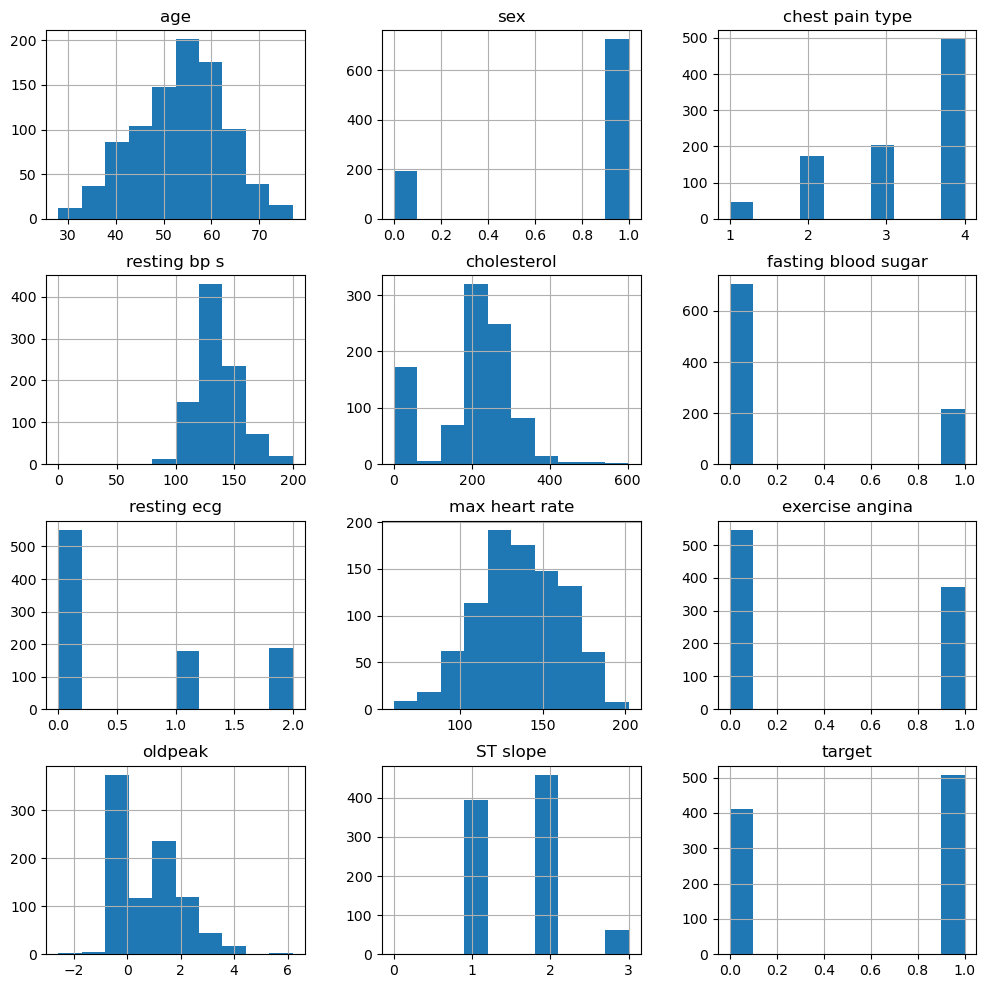

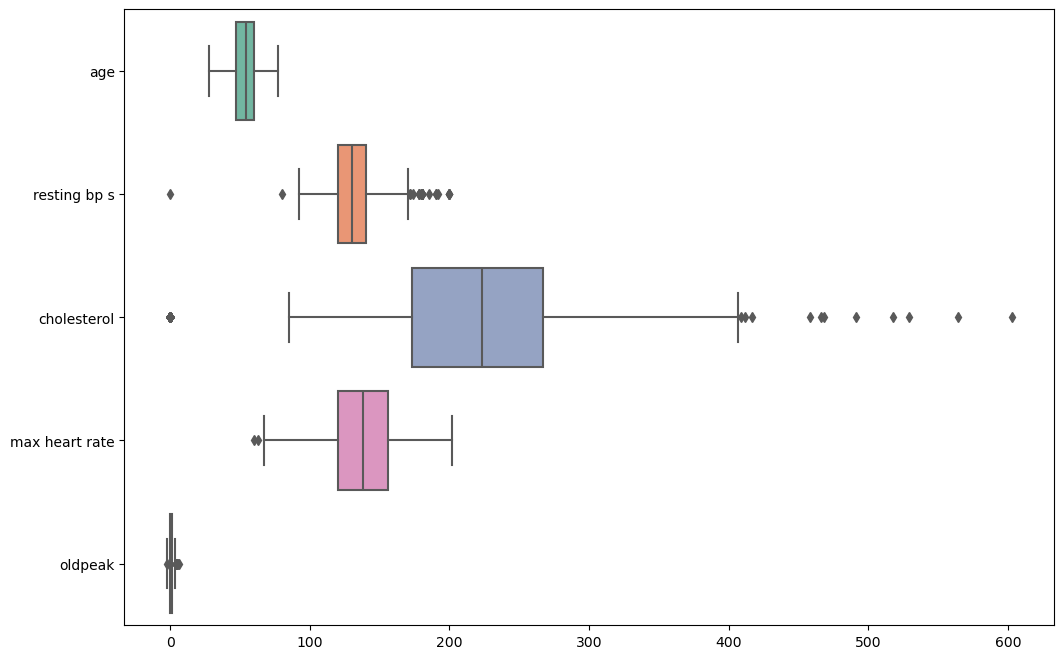

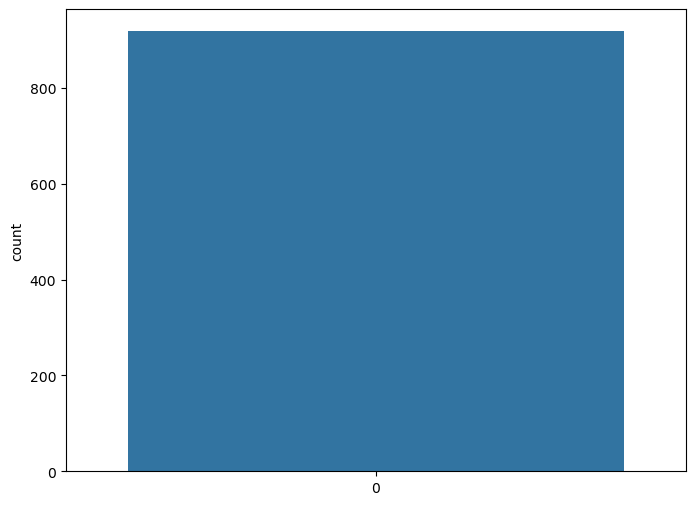

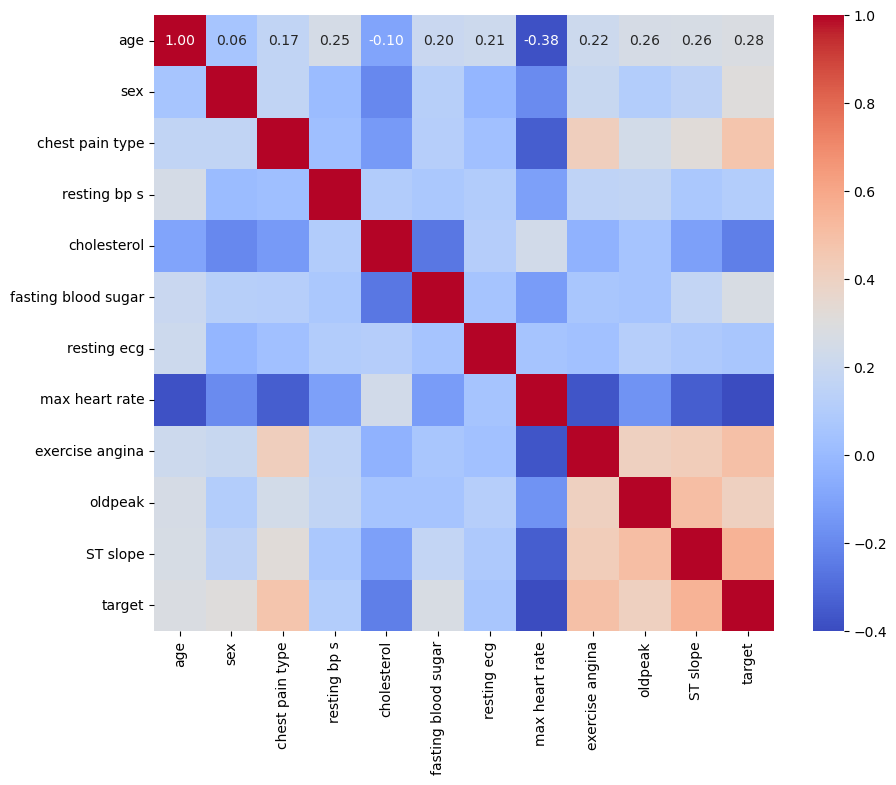

target
1    508
0    410
Name: count, dtype: int64
              age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your data is in a DataFrame called 'data'
# Replace 'data.csv' with your actual dataset file
data = df

# 1. Histograms or Density Plots
data.hist(figsize=(12, 12))
plt.show()

# 2. Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(['target','sex','chest pain type',          
'fasting blood sugar',      
'resting ecg',              
'exercise angina',          
'ST slope'], axis=1), orient='h', palette='Set2')
plt.show()

# 3. Count Plot for Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data['target'])
plt.show()

# 4. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 5. Imbalance Check
print(data['target'].value_counts())

# 6. Descriptive Statistics
print(data.describe())

# 7. Pairplot
# Uncomment the following lines if the number of features is manageable
# sns.pairplot(data, hue='target_variable')
# plt.show()


In [13]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your dataframe with 10 features
# Replace 'df' with the name of your dataframe if it's different
# Calculate Z-scores for each feature
z_scores = stats.zscore(data)

# Define a threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3

# Create a boolean mask indicating outliers for each feature
outlier_mask = (z_scores > threshold) | (z_scores < -threshold)

# Create a dataframe of outliers
outliers_df = data[outlier_mask.any(axis=1)]

# Display the dataframe of outliers
print("Outliers:")
print(outliers_df)
df_without_outliers=data[~outlier_mask.any(axis=1)]
print(df.shape)
print(df_without_outliers.shape)


Outliers:
      age  sex  chest pain type  resting bp s  cholesterol  \
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
325    46    1                4           100            0   
366    64    0                4           200            0   
391    51    1                4           140            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270   
734    56    0                4           200          288   
761    54    1                2           192          283  

In [76]:
df_without_outliers.shape
df_without_outliers.to_csv('data/model_ready_without_outliers.csv', index=False)

In [27]:
from sklearn.preprocessing import MinMaxScaler
import pickle as pk
import joblib
scaler = MinMaxScaler()
scaler1=MinMaxScaler()
#df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_without_target=df.drop(columns=['target'])
df_withou_target_normalized=pd.DataFrame(scaler1.fit_transform(df_without_target), columns=df_without_target.columns)
with open(r'feature_scaler.pkl', 'wb') as f:
    pk.dump(scaler, f)
with open(r'feature_scaler_without_target.pkl', 'wb') as f:
    pk.dump(scaler1, f)
#joblib.dump(scaler,'D:\VS_code\newpy\CVD\feature_scale.pkl')


In [ ]:
df_normalized_without_outliers = pd.DataFrame(scaler.fit_transform(df_without_outliers), columns=df_without_outliers.columns)

In [83]:
print(df_normalized.shape)
df_normalized.head()

(918, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.333333,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.666667,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.333333,0.0
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.666667,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.333333,0.0


In [84]:
print(df_normalized_without_outliers.shape)
df_normalized_without_outliers.head()

(899, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1.0,0.333333,0.571429,0.557915,0.0,0.0,0.784173,0.0,0.333333,0.333333,0.0
1,0.428571,0.0,0.666667,0.761905,0.347490,0.0,0.0,0.669065,0.0,0.500000,0.666667,1.0
2,0.183673,1.0,0.333333,0.476190,0.546332,0.0,0.5,0.251799,0.0,0.333333,0.333333,0.0
3,0.408163,0.0,1.000000,0.552381,0.413127,0.0,0.0,0.323741,1.0,0.583333,0.666667,1.0
4,0.530612,1.0,0.666667,0.666667,0.376448,0.0,0.0,0.424460,0.0,0.333333,0.333333,0.0


In [80]:
#save df to disk
df_normalized.to_csv('data/model_ready_data.csv', index=False)
df_normalized_without_outliers.to_csv('data/model_ready_data_without_outliers.csv', index=False)
    

        age  sex  chest pain type  resting bp s  cholesterol  \
0  0.244898  1.0         0.333333      0.571429     0.557915   
1  0.428571  0.0         0.666667      0.761905     0.347490   
2  0.183673  1.0         0.333333      0.476190     0.546332   
3  0.408163  0.0         1.000000      0.552381     0.413127   
4  0.530612  1.0         0.666667      0.666667     0.376448   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                  0.0          0.0        0.784173              0.0   
1                  0.0          0.0        0.669065              0.0   
2                  0.0          0.5        0.251799              0.0   
3                  0.0          0.0        0.323741              1.0   
4                  0.0          0.0        0.424460              0.0   

    oldpeak  ST slope  target  
0  0.333333  0.333333     0.0  
1  0.500000  0.666667     1.0  
2  0.333333  0.333333     0.0  
3  0.583333  0.666667     1.0  
4  0.333333  0.333333 

In [85]:
y=df_normalized['target']

In [86]:
X=df_normalized.drop('target',axis='columns')

In [87]:
X.shape


(918, 11)

In [88]:
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.333333
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.666667
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.333333
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.666667
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.333333


In [75]:

#X_norm=MinMaxScaler().fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
gbdt_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gbdt_clf.fit(X_train, y_train)
y_pred=gbdt_clf.predict(X_test)
y_pred_prob=gbdt_clf.predict_proba(X_test)[:,1]
accuracy=metrics.accuracy_score(y_test, y_pred)
auc=metrics.roc_auc_score(y_test, y_pred_prob)
print('accuracy:', accuracy)
print('auc:', auc)


accuracy: 0.8695652173913043
auc: 0.9377351620342274


In [90]:
import xgboost as xgb
xgb.XGBClassifier()

params = {'max_depth': 100, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
num_round = 20
dtrain= xgb.DMatrix(X_train, label=y_train)
print(y_train)
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
y_pred = xgb_model.predict(X_test)
print(y_test)

from sklearn.metrics import roc_auc_score
print("auc score is ",roc_auc_score(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(y_pred)
print("accuracy is",accuracy_score(y_test, y_pred))

795    0.0
25     0.0
84     1.0
10     0.0
344    1.0
      ... 
106    0.0
270    0.0
860    1.0
435    0.0
102    1.0
Name: target, Length: 734, dtype: float64
668    0.0
30     1.0
377    1.0
535    1.0
807    0.0
      ... 
211    1.0
745    1.0
584    1.0
878    0.0
451    1.0
Name: target, Length: 184, dtype: float64
auc score is  0.8556256827284863
[0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]
accuracy is 0.8532608695652174


[14:56:51] WARNING: D:\bld\xgboost-split_1705650090842\work\src\learner.cc:742: 
Parameters: { "silent" } are not used.



In [120]:
print(dtest.feature_types)

['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_reg_model=LogisticRegression(C=6.194397136552351,penalty='l2',solver='liblinear')
log_reg_model.fit(X_train,y_train)
y_pred=log_reg_model.predict(X_test)
y_pred_prob=log_reg_model.predict_proba(X_test)[:,1]
#print(y_pred)
#print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("auc score",roc_auc_score(y_test, y_pred_prob))
from sklearn.metrics import accuracy_score
print("acuracy score",accuracy_score(y_test, y_pred))

auc score 0.9078771695594126
acuracy score 0.8532608695652174


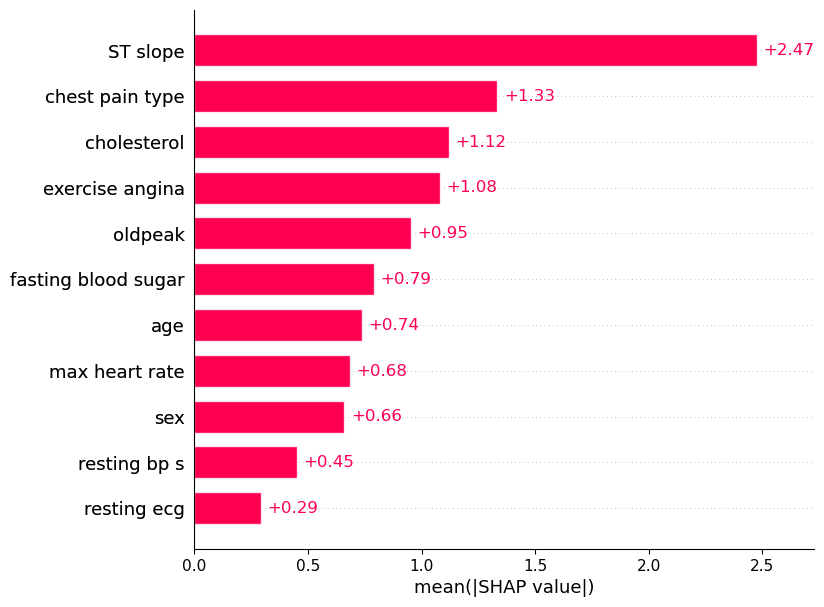

In [131]:
import shap 
explainer=shap.Explainer(xgb_model,X_test)
shap_values=explainer(X_test)
#shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values ,max_display=12)
#shap.plots.waterfall(shap_values[0])
#shap.plots.scatter(shap_values)


In [99]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model=SVC(kernel='rbf', C=4, gamma='auto',penalty=l1, random_state=0)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("auc score",roc_auc_score(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("acuracy score",accuracy_score(y_test, y_pred))

NameError: name 'l1' is not defined